## **Estudo de Classificação**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [55]:
data = pd.read_csv('../datasets/base/plants_model.csv')
data.head()

,family,categories,origin,climate,img_url,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code
0,Marantaceae,Hanging,Brazil,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,0,1,2
1,Arecaceae,Palm,Mexico,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,0,2,0
2,Araliaceae,Aralia,Asia,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2
3,Liliaceae,Sansevieria,South Africa,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,0,0,0
4,Araceae,Philodendron,Central America,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,0,3,2


### **Criação de Novas Features**

Experiencia Indicada (baseado em soil, sunlight)
- Experiente
- Amador
- Novato

Disponibilidade (baseado em water_category, sunlight)
- Alta
- Média
- Baixa


### **Classificando Dificuldade do Solo**

In [56]:
list(data['soil'].unique())

['Peat soils', 'Sandy soils', 'Loamy soils', 'Silty and clay soils']

- Loamy soils – (fácil)
    - Solo equilibrado, boa drenagem e retenção, fácil de corrigir e manter.
- Peat soils – (moderado)
    - Retém bem umidade, mas pode encharcar e tem pH ácido. Requer ajustes.
- Sandy soils – (moderado)
    - Fácil de trabalhar, mas seca rápido e perde nutrientes fácil. Precisa de manutenção constante.
- Silty and clay soils – (difícil)
    - Tendem a compactar e encharcar. Exigem bastante correção e cuidado com drenagem.

In [57]:
soil_difficulty = {
    'Loamy soils': 'easy',
    'Peat soils': 'medium',
    'Sandy soils': 'medium',
    'Silty and clay soils': 'hard'
}

data['soil_diff'] = data['soil'].map(soil_difficulty)
data.head()

,family,categories,origin,climate,img_url,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code,soil_diff
0,Marantaceae,Hanging,Brazil,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,0,1,2,medium
1,Arecaceae,Palm,Mexico,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,0,2,0,medium
2,Araliaceae,Aralia,Asia,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2,easy
3,Liliaceae,Sansevieria,South Africa,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,0,0,0,easy
4,Araceae,Philodendron,Central America,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,0,3,2,hard


### **Classificando Dificuldade da Incidência Solar**

In [58]:
list(data['sunlight'].unique())

['Partial shade', 'Full sun', 'Full sun or partial shade']

- Partial shade - (fácil)
    - Ambiente estável, menos risco de desidratação ou queimadura. Ideal pra plantas tropicais como samambaias.

- Full sun - (difícil)
    - Precisa de rega constante, risco alto de queimadura, exige espécies bem adaptadas. Mudanças no clima afetam muito.

- Full sun or partial shade - (moderado)
    - Mais versátil, mas ainda exige atenção à adaptação da planta ao ambiente. Pode sofrer em extremos de calor ou sombra.

In [59]:
sunlight_difficulty = {
    'Full sun': 'hard',
    'Partial shade': 'easy',
    'Full sun or partial shade': 'medium'
}

data['sunlight_diff'] = data['sunlight'].map(sunlight_difficulty)
data.head()

,family,categories,origin,climate,img_url,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code,soil_diff,sunlight_diff
0,Marantaceae,Hanging,Brazil,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,0,1,2,medium,easy
1,Arecaceae,Palm,Mexico,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,0,2,0,medium,hard
2,Araliaceae,Aralia,Asia,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2,easy,easy
3,Liliaceae,Sansevieria,South Africa,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,0,0,0,easy,hard
4,Araceae,Philodendron,Central America,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,0,3,2,hard,easy


### **Classificando Dificuldade da Frequência de Rega**

In [60]:
list(data['water_category'].unique())

['weekly', '7-10 days', '2-4 weeks']

In [61]:
water_difficulty = {
    'weekly': 'hard',
    '7-10 days': 'medium',
    '2-4 weeks': 'easy',
}

data['water_diff'] = data['water_category'].map(water_difficulty)
data.head()

,family,categories,origin,climate,img_url,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code,soil_diff,sunlight_diff,water_diff
0,Marantaceae,Hanging,Brazil,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,0,1,2,medium,easy,hard
1,Arecaceae,Palm,Mexico,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,0,2,0,medium,hard,hard
2,Araliaceae,Aralia,Asia,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2,easy,easy,hard
3,Liliaceae,Sansevieria,South Africa,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,0,0,0,easy,hard,hard
4,Araceae,Philodendron,Central America,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,0,3,2,hard,easy,hard


## **Codificando as Dificuldades**

In [62]:
data_points = data.drop(columns=['family', 'categories', 'origin', 'climate', 'img_url', 'water_category', 'soil', 'sunlight', 'water_category_code', 'soil_code', 'sunlight_code'])
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff
0,Herringbone,0,1,small,1,0,medium,easy,hard
1,Bella palm,0,1,small,1,0,medium,hard,hard
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard
3,Snake plant,1,0,small,1,0,easy,hard,hard
4,Parlor ivy,1,0,small,1,0,hard,easy,hard


In [63]:
data_points['soil_diff_code'] = data_points['soil_diff'].map({'easy': 0, 'medium': 1, 'hard': 2})
data_points['sunlight_diff_code'] = data_points['sunlight_diff'].map({'easy': 0, 'medium': 1, 'hard': 2})
data_points['water_diff_code'] = data_points['water_diff'].map({'easy': 0, 'medium': 1, 'hard': 2})
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code
0,Herringbone,0,1,small,1,0,medium,easy,hard,1,0,2
1,Bella palm,0,1,small,1,0,medium,hard,hard,1,2,2
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,0,0,2
3,Snake plant,1,0,small,1,0,easy,hard,hard,0,2,2
4,Parlor ivy,1,0,small,1,0,hard,easy,hard,2,0,2


### **Definindo Nível Indicado de Experiência e Disponibilidade**

In [64]:
def define_experience_level(row):
    exp_points = row['soil_diff_code'] + row['sunlight_diff_code'] 
    
    if exp_points <= 1:
        return 'Begginer'
    elif exp_points <= 2:
        return 'Amateur'
    else:
        return 'Experienced'


data_points['experience_level'] = data_points.apply(define_experience_level, axis=1)
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code,experience_level
0,Herringbone,0,1,small,1,0,medium,easy,hard,1,0,2,Begginer
1,Bella palm,0,1,small,1,0,medium,hard,hard,1,2,2,Experienced
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,0,0,2,Begginer
3,Snake plant,1,0,small,1,0,easy,hard,hard,0,2,2,Amateur
4,Parlor ivy,1,0,small,1,0,hard,easy,hard,2,0,2,Amateur


In [65]:
data_points['experience_level'].value_counts()

experience_level
Amateur        16
Begginer       14
Experienced    14
Name: count, dtype: int64

In [66]:
def define_disponibility_level(row):
    disp_points = row['water_diff_code'] + row['sunlight_diff_code'] 
    
    if disp_points <= 2:
        return 'Low'
    elif 2 < disp_points < 4:
        return 'Medium'
    else:
        return 'High'
    
data_points['disponibility_level'] = data_points.apply(define_disponibility_level, axis=1)
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code,experience_level,disponibility_level
0,Herringbone,0,1,small,1,0,medium,easy,hard,1,0,2,Begginer,Low
1,Bella palm,0,1,small,1,0,medium,hard,hard,1,2,2,Experienced,High
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,0,0,2,Begginer,Low
3,Snake plant,1,0,small,1,0,easy,hard,hard,0,2,2,Amateur,High
4,Parlor ivy,1,0,small,1,0,hard,easy,hard,2,0,2,Amateur,Low


In [67]:
data_points['disponibility_level'].value_counts()

disponibility_level
Low       29
High       8
Medium     7
Name: count, dtype: int64

In [68]:
data_info = data_points.drop(columns=['venomous', 'soil_diff', 'soil_diff_code', 'sunlight_diff', 'sunlight_diff_code', 'water_diff', 'water_diff_code'])
data_info.to_csv('../datasets/base/plants_info.csv', index=False)
data_info.head()

,name,ind_pets,size,ind_apartment,size_code,experience_level,disponibility_level
0,Herringbone,1,small,1,0,Begginer,Low
1,Bella palm,1,small,1,0,Experienced,High
2,Fabian Aralia,1,medium,1,1,Begginer,Low
3,Snake plant,0,small,1,0,Amateur,High
4,Parlor ivy,0,small,1,0,Amateur,Low


## **Agrupamento das Plantas**

### **Codificação e Normalização dos Dados**

In [69]:
data_coded = data_info.copy()  

data_coded['experience_level_code'] = data_coded['experience_level'].map({'Begginer': 0, 'Amateur': 1, 'Experienced': 2})
data_coded['disponibility_level_code'] = data_coded['disponibility_level'].map({'Low': 0, 'Medium': 1, 'High': 2})
data_coded.drop(columns=['size', 'experience_level', 'disponibility_level'], inplace=True)
data_coded.head()


,name,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,Herringbone,1,1,0,0,0
1,Bella palm,1,1,0,2,2
2,Fabian Aralia,1,1,1,0,0
3,Snake plant,0,1,0,1,2
4,Parlor ivy,0,1,0,1,0


In [107]:
data_coded['experience_level_code'].value_counts()

experience_level_code
1    16
0    14
2    14
Name: count, dtype: int64

In [70]:
data_ml = data_coded.copy()
data_ml.drop(columns=['name'], inplace=True)

data_ml.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,1,1,0,0,0
1,1,1,0,2,2
2,1,1,1,0,0
3,0,1,0,1,2
4,0,1,0,1,0


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_ml_normalized = scaler.fit_transform(data_ml)

data_ml_normalized = pd.DataFrame(data_ml_normalized, columns=data_ml.columns)
data_ml_normalized

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,1.0,1.0,0.000000,0.0,0.0
1,1.0,1.0,0.000000,1.0,1.0
2,1.0,1.0,0.333333,0.0,0.0
3,0.0,1.0,0.000000,0.5,1.0
4,0.0,1.0,0.000000,0.5,0.0
5,1.0,1.0,0.000000,1.0,1.0
6,1.0,1.0,0.333333,1.0,1.0
7,0.0,0.0,0.666667,0.5,0.5
8,0.0,0.0,1.000000,1.0,0.0
9,1.0,0.0,0.666667,0.5,1.0


### **Aplicando o Modelo**

Text(0.5, 1.0, 'Elbow Method')

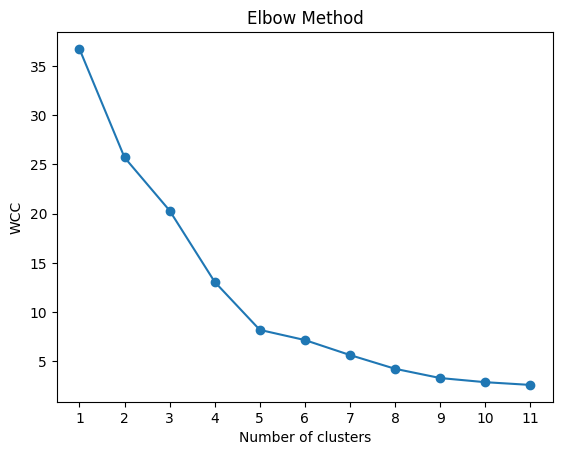

In [72]:
from sklearn.cluster import KMeans

wcss = [] 

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_ml_normalized)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 12), wcss, marker='o')
plt.xticks(range(1, 12))
plt.xlabel('Number of clusters')
plt.ylabel('WCC')
plt.title('Elbow Method')


A escolha do K = 5, tem como base o cenário de que:

Mesmo que se tenham grupos um pouco mais despersos, a variedade oferecida para o usuário, no final, vai ser maior, e no contexto da aplicação faz mais sentido

In [73]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pred = kmeans.fit_predict(data_ml_normalized)

data_ml_normalized['kmeans_group'] = kmeans_pred
data_ml_normalized.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
0,1.0,1.0,0.000000,0.0,0.0,1
1,1.0,1.0,0.000000,1.0,1.0,2
2,1.0,1.0,0.333333,0.0,0.0,1
3,0.0,1.0,0.000000,0.5,1.0,0
4,0.0,1.0,0.000000,0.5,0.0,0


### **Resultados Agrupamento**

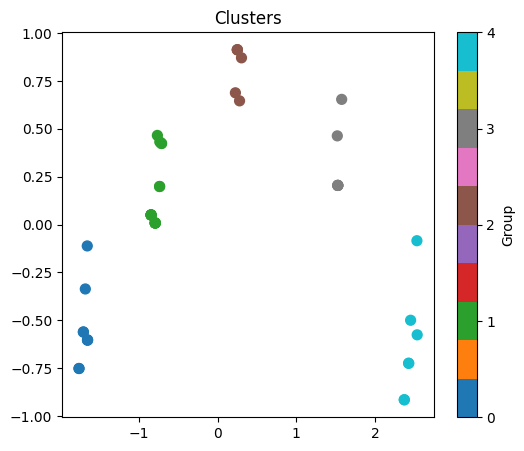

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_ml_normalized)

plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_ml_normalized['kmeans_group'], cmap='tab10', s=50)
plt.colorbar(label='Group', ticks=range(n_clusters))
plt.title('Clusters')
plt.show()

In [75]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_ml_normalized, data_ml_normalized['kmeans_group'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.644035580533107


In [76]:
data_grouped = data_ml_normalized.copy()
data_grouped['name'] = data_coded['name']
data_grouped.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group,name
0,1.0,1.0,0.000000,0.0,0.0,1,Herringbone
1,1.0,1.0,0.000000,1.0,1.0,2,Bella palm
2,1.0,1.0,0.333333,0.0,0.0,1,Fabian Aralia
3,0.0,1.0,0.000000,0.5,1.0,0,Snake plant
4,0.0,1.0,0.000000,0.5,0.0,0,Parlor ivy


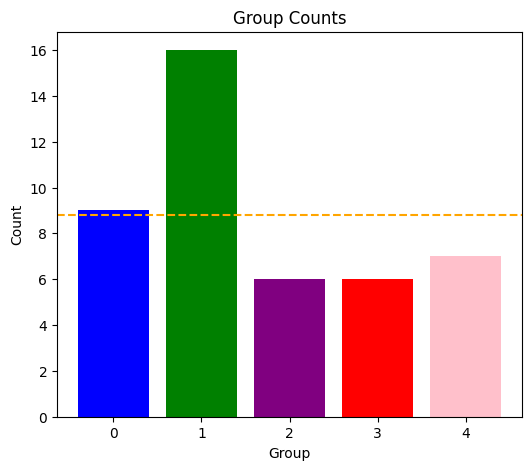

In [77]:
plt.figure(figsize=(6, 5))

colors = ['blue', 'green', 'purple', 'red', 'pink']
group_counts = data_grouped['kmeans_group'].value_counts()
mean_count = group_counts.mean()


plt.bar(group_counts.index, group_counts, color=[colors[i] for i in group_counts.index])
plt.axhline(mean_count, color='orange', linestyle='--', label='Mean Count')

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Group Counts')

plt.xticks(group_counts.index)
plt.show()

A maior parte das plantas agrupadas se encontram no cluster 1 (16), e a menor quantidade no cluster 2 e 3 (6).

A partir dessas informações, definimos que a quantidade de plantas a serem indicadas para o usuário seria de 4 plantas.

### **Analise e Nomeação dos Grupos**

In [78]:
group_0 = data_grouped[data_grouped['kmeans_group'] == 0]
group_1 = data_grouped[data_grouped['kmeans_group'] == 1]
group_2 = data_grouped[data_grouped['kmeans_group'] == 2]
group_3 = data_grouped[data_grouped['kmeans_group'] == 3]
group_4 = data_grouped[data_grouped['kmeans_group'] == 4]

{'big': np.int64(0),
 'medium': np.int64(1),
 'small': np.int64(2),
 'very big': np.int64(3)}

In [79]:
data_grouped['size_code'].value_counts()

size_code
0.000000    17
0.333333    14
0.666667    12
1.000000     1
Name: count, dtype: int64

In [80]:
data_grouped['experience_level_code'].value_counts()

experience_level_code
0.5    16
0.0    14
1.0    14
Name: count, dtype: int64

In [81]:
data_grouped['disponibility_level_code'].value_counts()

disponibility_level_code
0.0    29
1.0     8
0.5     7
Name: count, dtype: int64

In [82]:
group_0.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,9.0,9.0,9.000000,9.000000,9.000000,9.0
mean,0.0,1.0,0.111111,0.388889,0.166667,0.0
std,0.0,0.0,0.166667,0.220479,0.353553,0.0
min,0.0,1.0,0.000000,0.000000,0.000000,0.0
25%,0.0,1.0,0.000000,0.500000,0.000000,0.0
50%,0.0,1.0,0.000000,0.500000,0.000000,0.0
75%,0.0,1.0,0.333333,0.500000,0.000000,0.0
max,0.0,1.0,0.333333,0.500000,1.000000,0.0


**Plantas do Grupo 0** 
- Não indicadas para Pet (venenosas)
- Casa ou Apartamento
- Pequenas
- Amador
- Baixa Disponibilidade

In [83]:
group_1.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,16.0,16.0,16.000000,16.000000,16.000000,16.0
mean,1.0,1.0,0.187500,0.218750,0.093750,1.0
std,0.0,0.0,0.170783,0.314576,0.201556,0.0
min,1.0,1.0,0.000000,0.000000,0.000000,1.0
25%,1.0,1.0,0.000000,0.000000,0.000000,1.0
50%,1.0,1.0,0.333333,0.000000,0.000000,1.0
75%,1.0,1.0,0.333333,0.500000,0.000000,1.0
max,1.0,1.0,0.333333,1.000000,0.500000,1.0


**Plantas do Grupo 1**
- Indicadas para Pets (não venenosas)
- Casa ou Apartamento
- Médias
- Iniciante
- Baixa Disponibilidade

In [84]:
group_2.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,6.0,6.0,6.000000,6.0,6.000000,6.0
mean,1.0,1.0,0.111111,1.0,0.833333,2.0
std,0.0,0.0,0.172133,0.0,0.258199,0.0
min,1.0,1.0,0.000000,1.0,0.500000,2.0
25%,1.0,1.0,0.000000,1.0,0.625000,2.0
50%,1.0,1.0,0.000000,1.0,1.000000,2.0
75%,1.0,1.0,0.250000,1.0,1.000000,2.0
max,1.0,1.0,0.333333,1.0,1.000000,2.0


**Plantas do Grupo 2**
- Indicadas para Pets (não venenosas)
- Casa ou Apartamento
- Pequenas
- Experiente
- Alta  Disponibilidade

In [85]:
group_3.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,6.0,6.0,6.000000,6.000000,6.000000,6.0
mean,1.0,0.0,0.666667,0.916667,0.333333,3.0
std,0.0,0.0,0.000000,0.204124,0.516398,0.0
min,1.0,0.0,0.666667,0.500000,0.000000,3.0
25%,1.0,0.0,0.666667,1.000000,0.000000,3.0
50%,1.0,0.0,0.666667,1.000000,0.000000,3.0
75%,1.0,0.0,0.666667,1.000000,0.750000,3.0
max,1.0,0.0,0.666667,1.000000,1.000000,3.0


**Plantas do Grupo 3**
- Indicadas para Pets (não venenosas)
- Casa
- Grandes
- Experiente
- Média Disponibilidade

In [86]:
group_4.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,7.0,7.0,7.000000,7.000000,7.000000,7.0
mean,0.0,0.0,0.714286,0.500000,0.214286,4.0
std,0.0,0.0,0.125988,0.408248,0.393398,0.0
min,0.0,0.0,0.666667,0.000000,0.000000,4.0
25%,0.0,0.0,0.666667,0.250000,0.000000,4.0
50%,0.0,0.0,0.666667,0.500000,0.000000,4.0
75%,0.0,0.0,0.666667,0.750000,0.250000,4.0
max,0.0,0.0,1.000000,1.000000,1.000000,4.0


**Plantas do Grupo 4**
- Não indicadas para Pets (venenosas)
- Casa
- Grandes
- Amador
- Baixa Disponibilidade

**Comparação entre Características**

| Características           | Grupo 0                           | Grupo 1                           | Grupo 2                           | Grupo 3                           | Grupo 4                           |
|----------------------------|------------------------------------|------------------------------------|------------------------------------|------------------------------------|------------------------------------|
| Indicadas para Pets        | Não (venenosas)                   | Sim (não venenosas)                | Sim (não venenosas)                | Sim (não venenosas)                | Não (venenosas)                   |
| Ambiente                   | Casa ou Apartamento               | Casa ou Apartamento               | Casa ou Apartamento               | Casa                              | Casa                              |
| Tamanho                    | Pequenas                         | Médias                            | Pequenas                         | Grandes                           | Grandes                           |
| Nível de experiência       | Amador                            | Iniciante                         | Experiente                        | Experiente                        | Amador                            |
| Disponibilidade            | Baixa                             | Baixa                             | Alta                              | Média                             | Baixa                             |


**Nomeação dos Grupos**

| Grupo | Nome      | Descrição |
|:-----:|:--------------------|:--------------|
| 0     | Miniaturas Tóxicas     | Pequenas, venenosas, exigem cuidado até de amadores.|
| 1     | Companhia Segura     | Médias, seguras para pets, feitas para iniciantes. |
| 2     | Domínio Verde        | Pequenas, seguras, para experientes, alta disponibilidade, mas exige "domínio" no cultivo. |
| 3     | Guardião Natural     | Grandes, seguras, exigem espaço e experiência. |
| 4     | Majestade Tóxica     | Grandes, venenosas, mas não exigem muita experiência e disponibilidade.|


In [87]:
group_names = {
    0: "Miniaturas Tóxicas",
    1: "Companhia Segura",
    2: "Domínio Verde",
    3: "Guardião Natural",
    4: "Majestade Tóxica"
}

In [88]:
data_grouped['group_name'] = data_grouped['kmeans_group'].map(group_names)
data_grouped['group_name'].value_counts()

group_name
Companhia Segura      16
Miniaturas Tóxicas     9
Majestade Tóxica       7
Domínio Verde          6
Guardião Natural       6
Name: count, dtype: int64

## **Classificando um Novo Elemento**

### **Criando um Usuário Sintético**

Criação de um usuário sintético para a simulação de uma classificação e indicação do sistema

In [89]:
new_user = pd.DataFrame({
    'ind_pets': [0], #não tem pets
    'ind_apartment': [0], #não mora em apartamento
    'size_code': [1], 
    'experience_level_code': [1],
    'disponibility_level_code': [1],
})
new_user.head()

new_user_normalized = scaler.transform(new_user)

### **Classificando o Usuário**

In [90]:
new_user_normalized = pd.DataFrame(new_user_normalized, columns=new_user.columns)
new_user_normalized

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,0.0,0.0,0.333333,0.5,0.5


In [91]:
data_grouped.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group,name,group_name
0,1.0,1.0,0.000000,0.0,0.0,1,Herringbone,Companhia Segura
1,1.0,1.0,0.000000,1.0,1.0,2,Bella palm,Domínio Verde
2,1.0,1.0,0.333333,0.0,0.0,1,Fabian Aralia,Companhia Segura
3,0.0,1.0,0.000000,0.5,1.0,0,Snake plant,Miniaturas Tóxicas
4,0.0,1.0,0.000000,0.5,0.0,0,Parlor ivy,Miniaturas Tóxicas


In [92]:
data_distances = data_grouped.drop(columns=['kmeans_group', 'name', 'group_name'])
data_distances.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,1.0,1.0,0.000000,0.0,0.0
1,1.0,1.0,0.000000,1.0,1.0
2,1.0,1.0,0.333333,0.0,0.0
3,0.0,1.0,0.000000,0.5,1.0
4,0.0,1.0,0.000000,0.5,0.0


In [93]:
from scipy.spatial.distance import cdist


distances = cdist(new_user_normalized, data_distances, metric='euclidean')

distances_df = pd.DataFrame(distances.T, columns=['Distance'])
distances_df['Plant Index'] = data_ml_normalized.index
distances_df['Plant Name'] = data_grouped.loc[data_ml_normalized.index, 'name'].values
distances_df['Group'] = data_grouped.loc[data_ml_normalized.index, 'group_name'].values
distances_df = distances_df.sort_values(by='Distance')


distances_df.head()

,Distance,Plant Index,Plant Name,Group
7,0.333333,7,Spineless yucca,Majestade Tóxica
10,0.600925,10,Fernleaf Philodendron,Majestade Tóxica
27,0.600925,27,Indian kale,Majestade Tóxica
22,0.781736,22,Dragon-tree Agave,Majestade Tóxica
43,0.781736,43,Blue Agave,Majestade Tóxica


Adquirir as distancias entre cada planta existente e o novo usuário para realizar o calculo da porcentagem da compatibilidade,
que se baseia nas seguintes regras:

- Distance = 0.0 => Compatibility = 100%
- Distance = Max(Distance) => Compatibility = 0%

In [94]:
compatibility_percentage = round(100 - (distances_df['Distance'] / distances_df['Distance'].max() * 100),0)
distances_df['Compatibility Percentage'] = compatibility_percentage.astype(float)
distances_df.head()

,Distance,Plant Index,Plant Name,Group,Compatibility Percentage
7,0.333333,7,Spineless yucca,Majestade Tóxica,79.0
10,0.600925,10,Fernleaf Philodendron,Majestade Tóxica,63.0
27,0.600925,27,Indian kale,Majestade Tóxica,63.0
22,0.781736,22,Dragon-tree Agave,Majestade Tóxica,52.0
43,0.781736,43,Blue Agave,Majestade Tóxica,52.0


### **Resultado das Indicações**

Para indicação ao usuário final, consideramos apenas as 4 maiores compatibilidades maiores que 0%

In [95]:
compatibility_df = distances_df[distances_df['Compatibility Percentage'] > 0]
compatibility_df = compatibility_df.head(4)
compatibility_df

,Distance,Plant Index,Plant Name,Group,Compatibility Percentage
7,0.333333,7,Spineless yucca,Majestade Tóxica,79.0
10,0.600925,10,Fernleaf Philodendron,Majestade Tóxica,63.0
27,0.600925,27,Indian kale,Majestade Tóxica,63.0
22,0.781736,22,Dragon-tree Agave,Majestade Tóxica,52.0


## **Datasets e Pickles Resultantes**

### **Datasets**

In [96]:
# juntar o data_distabces com o data_grouped

data_complete = data.copy()
data_complete = data_complete.merge(data_grouped, left_on='name', right_on='name', how='left')
data_complete = data_complete.drop(columns=['ind_pets_y', 'ind_apartment_y', 'size_code_y'])
data_complete = data_complete.rename(columns={'ind_pets_x': 'ind_pets', 'ind_apartment_x': 'ind_apartment', 'size_code_x': 'size_code'})

data_complete.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   family                    46 non-null     object 
 1   categories                46 non-null     object 
 2   origin                    46 non-null     object 
 3   climate                   46 non-null     object 
 4   img_url                   46 non-null     object 
 5   name                      46 non-null     object 
 6   water_category            46 non-null     object 
 7   venomous                  46 non-null     int64  
 8   ind_pets                  46 non-null     int64  
 9   size                      46 non-null     object 
 10  ind_apartment             46 non-null     int64  
 11  soil                      46 non-null     object 
 12  sunlight                  46 non-null     object 
 13  water_category_code       46 non-null     int64  
 14  size_code   

In [97]:
data_complete.head()

,family,categories,origin,climate,img_url,name,water_category,venomous,ind_pets,size,...,size_code,soil_code,sunlight_code,soil_diff,sunlight_diff,water_diff,experience_level_code,disponibility_level_code,kmeans_group,group_name
0,Marantaceae,Hanging,Brazil,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Herringbone,weekly,0,1,small,...,0,1,2,medium,easy,hard,0.0,0.0,1,Companhia Segura
1,Arecaceae,Palm,Mexico,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly,0,1,small,...,0,2,0,medium,hard,hard,1.0,1.0,2,Domínio Verde
2,Arecaceae,Palm,Mexico,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Bella palm,weekly,0,1,small,...,0,2,0,medium,hard,hard,1.0,1.0,2,Domínio Verde
3,Araliaceae,Aralia,Asia,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Fabian Aralia,weekly,0,1,medium,...,1,0,2,easy,easy,hard,0.0,0.0,1,Companhia Segura
4,Liliaceae,Sansevieria,South Africa,Tropical,http://www.tropicopia.com/house-plant/thumbnai...,Snake plant,weekly,1,0,small,...,0,0,0,easy,hard,hard,0.5,1.0,0,Miniaturas Tóxicas


In [98]:
data_grouped.to_csv('../datasets/results/plants_grouped.csv', index=False)
# Colunas: ['kmeans_group', 'name', 'group_name', 'soil_diff_code', 'sunlight_diff_code', 'water_diff_code', 'experience_level_code', 'disponibility_level_code']

data_distances.to_csv('../datasets/results/plants_distances.csv', index=False)
# Colunas: ['Distance', 'Plant Index', 'Plant Name', 'Group']

data_complete.to_csv('../datasets/results/plants_complete.csv', index=False) 
# Colunas: ['name', 'soil_diff_code', 'sunlight_diff_code', 'water_diff_code', 'experience_level_code', 'disponibility_level_code', 'kmeans_group', 'group_name']

### **Pickels**

O calulo das distancias deve ser feito apenas com as colunas abaixo, porém do dataset "plants_complete.csv", para que além de calcular as distancias, conseguir exibir as informações importantes de cada planta

In [99]:
data_distances.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,1.0,1.0,0.000000,0.0,0.0
1,1.0,1.0,0.000000,1.0,1.0
2,1.0,1.0,0.333333,0.0,0.0
3,0.0,1.0,0.000000,0.5,1.0
4,0.0,1.0,0.000000,0.5,0.0


In [100]:
import pickle

with open('../pickles/plant_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
with open('../pickles/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('../pickles/plant_distances.pkl', 'wb') as file:
    pickle.dump(distances, file)

## **Plot dos Resultados**

### **Disponibilidade e Experiência**

In [101]:
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code,experience_level,disponibility_level
0,Herringbone,0,1,small,1,0,medium,easy,hard,1,0,2,Begginer,Low
1,Bella palm,0,1,small,1,0,medium,hard,hard,1,2,2,Experienced,High
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,0,0,2,Begginer,Low
3,Snake plant,1,0,small,1,0,easy,hard,hard,0,2,2,Amateur,High
4,Parlor ivy,1,0,small,1,0,hard,easy,hard,2,0,2,Amateur,Low


In [102]:
def count_plot(ds, column, title):
    plt.figure(figsize=(4, 4))
    sns.countplot(data=ds, x=column)
    plt.xlabel(title)
    plt.title(title)
    plt.show()

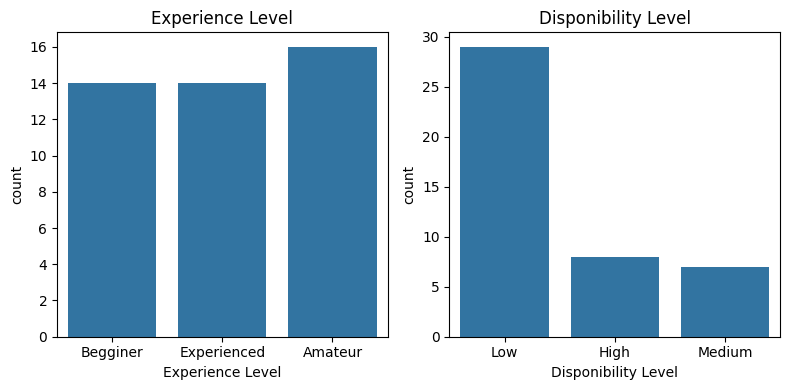

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(data=data_points, x='experience_level', ax=axes[0])
axes[0].set_title('Experience Level')
axes[0].set_xlabel('Experience Level')

sns.countplot(data=data_points, x='disponibility_level', ax=axes[1])
axes[1].set_title('Disponibility Level')
axes[1].set_xlabel('Disponibility Level')

plt.tight_layout()
plt.show()

### **Agrupamento e suas Características**

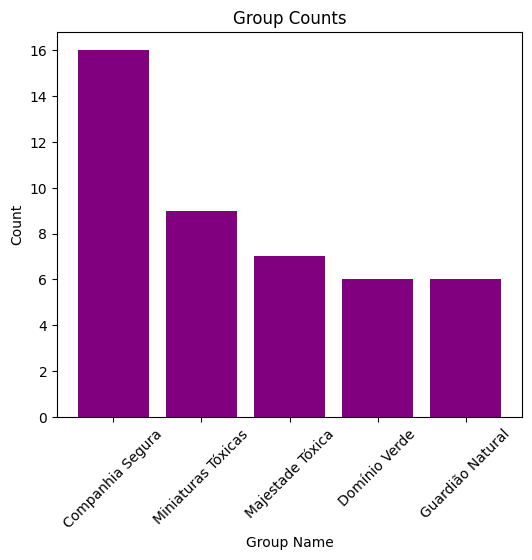

In [104]:
# Plot the group counts
plt.figure(figsize=(6, 5))
plt.bar(data_grouped['group_name'].value_counts().index, data_grouped['group_name'].value_counts(), color='purple')
plt.xlabel('Group Name')
plt.ylabel('Count')
plt.title('Group Counts')
plt.xticks(rotation=45)
plt.show()

In [105]:
data_grouped.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group,name,group_name
0,1.0,1.0,0.000000,0.0,0.0,1,Herringbone,Companhia Segura
1,1.0,1.0,0.000000,1.0,1.0,2,Bella palm,Domínio Verde
2,1.0,1.0,0.333333,0.0,0.0,1,Fabian Aralia,Companhia Segura
3,0.0,1.0,0.000000,0.5,1.0,0,Snake plant,Miniaturas Tóxicas
4,0.0,1.0,0.000000,0.5,0.0,0,Parlor ivy,Miniaturas Tóxicas


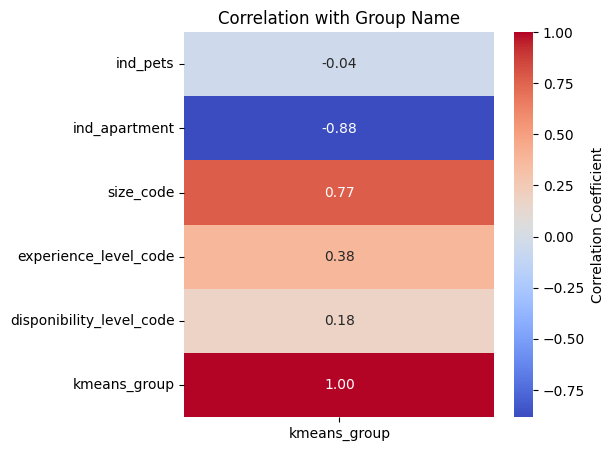

In [106]:

data_plot = data_grouped.copy()
data_plot = data_plot.drop(columns=['name', 'group_name'])

correlation = data_plot.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation[['kmeans_group']], annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation with Group Name')
plt.show()